## Lorenz attractor

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
with open("Lorenz.log") as f:
    log = [{ elem[0]:elem[1] for elem in [ f.split(":",2) for f in line.split("\t")]} for line in f]

In [4]:
df = pd.DataFrame(log).convert_objects(convert_numeric=True, copy=False)

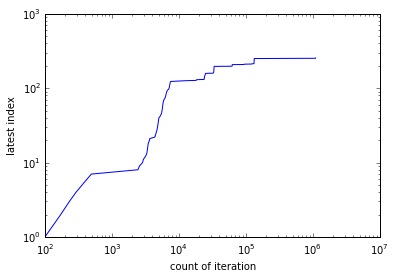

In [5]:
new_index = df["new_index"]
count = df["count"]
plt.plot(count, new_index)
plt.xlabel("count of iteration")
plt.ylabel("latest index")
plt.xscale("log")
plt.yscale("log")